# Empirical Cumulative Distribution Functions for Outlier Detection: (ECOD) Algorithm in Details

In [1]:
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt
import seaborn as sns

from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# Configuration

DATA_DIR = Path(r"../../datasets/").resolve()
CARDIO_DATA_PATH = DATA_DIR.joinpath("Classical/6_cardio.npz")


# ================= load dataset ===============================
cardio = np.load(CARDIO_DATA_PATH, allow_pickle=True)
X, y = cardio['X'], cardio['y']


labels = y
features = X

In this notebook we will go over the ECOD algorithm in details, how it works, where it shines and we will explain it using generated data and apply it to a set of datasets:


On Training Data:
ECOD ROC:0.9562, precision @ rank n:0.65

On Test Data:
ECOD ROC:0.935, precision @ rank n:0.4


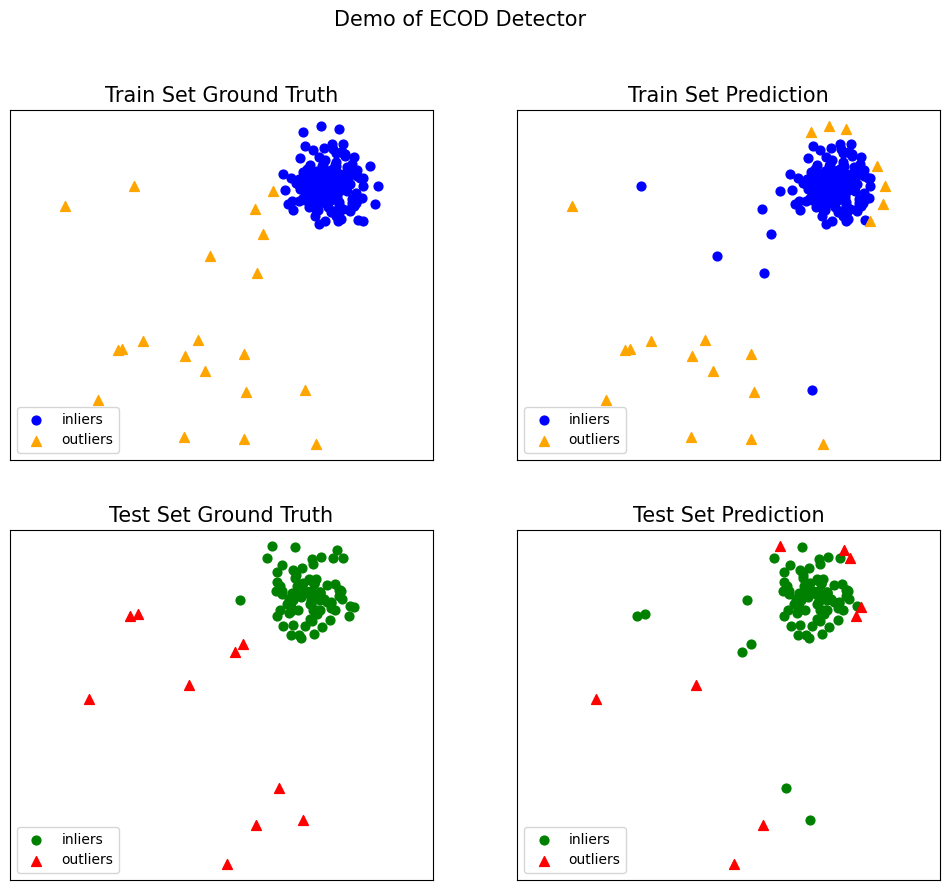

In [3]:
if __name__ == "__main__":
    contamination = 0.1                        # percentage of outliers
    n_train = 200                              # number of training points
    n_test = 100                               # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train ECOD detector
    clf_name = 'ECOD'
    clf = ECOD()

    # you could try parallel version as well.
    # clf = ECOD(n_jobs=2)
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_                                           # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_                                # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

In [4]:


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Initialize the ECOD model
ecod = ECOD()

# Fit the model to the scaled data
ecod.fit(X_scaled)

# Predict the outliers
y_pred = ecod.labels_                 # binary labels (0: inliers, 1: outliers)
y_scores = ecod.decision_scores_      # raw outlier scores

# Print the number of outliers detected
print(f"Number of outliers detected: {sum(y_pred)}")

Number of outliers detected: 183


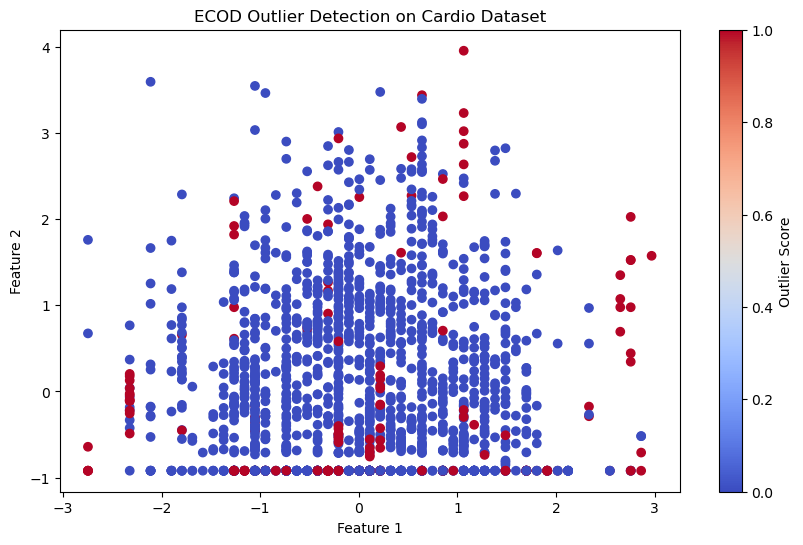

In [6]:
import matplotlib.pyplot as plt

# Scatter plot for the first two features with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='coolwarm', marker='o')
plt.title("ECOD Outlier Detection on Cardio Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Outlier Score")
plt.show()

In [24]:
1831 / 0.1

18310.0

In [25]:
1831 * 0.1

183.10000000000002

In [27]:
10/100

0.1

In [36]:
print(np.sum(y))
print(y.shape)

176
(1831,)


In [37]:
1831/176

10.403409090909092

# ECOD Theory
The ECOD (Empirical Cumulative Distribution Functions for Outlier Detection) algorithm is a model that detects anomalies based on empirical cumulative distribution functions. One of the key parameters of this algorithm is **contamination**. Here’s an explanation of what contamination is in the context of ECOD and outlier detection:

### What is Contamination?

- **Definition**: In the context of anomaly detection algorithms, contamination refers to the estimated proportion of outliers present in the dataset. It is a hyperparameter used to specify the expected fraction of the dataset that consists of outliers or anomalies.
- **Purpose**: The contamination parameter helps the algorithm determine the threshold for classifying a data point as an outlier. It guides the model in distinguishing between normal and anomalous data points.
- **Typical Usage**: Contamination is particularly useful when you have some prior knowledge or an estimate of the number of anomalies present in your dataset. Setting this parameter allows the algorithm to adjust its sensitivity to detecting outliers accordingly.

### How Contamination Works in ECOD

The ECOD algorithm uses the contamination parameter to influence its decision threshold for identifying anomalies. Here’s how it typically works:

1. **Estimate Proportion of Outliers**:
   - When you specify a contamination value, you are essentially telling the model what fraction of the dataset you expect to be outliers. For example, a contamination value of 0.1 means you expect 10% of the data to be anomalies.
   
2. **Empirical Distribution Calculation**:
   - ECOD computes the empirical cumulative distribution for each feature. This involves calculating the probability distribution of feature values across the dataset.
   
3. **Anomaly Scoring**:
   - Each data point is assigned an anomaly score based on how far its feature values deviate from the expected empirical distribution. Points with unusual feature values receive higher scores.
   
4. **Threshold Determination**:
   - The contamination parameter helps determine the threshold score above which data points are classified as outliers. The algorithm aims to classify a proportion of the data equal to the contamination value as outliers.
   
5. **Flexibility in Detection**:
   - By adjusting the contamination parameter, you can make the model more or less sensitive to outliers. A higher contamination value may result in more points being classified as outliers, while a lower value makes the model more conservative.

### Choosing the Right Contamination Value

Selecting an appropriate contamination value is crucial for achieving accurate outlier detection. Here are some tips for choosing the right value:

- **Domain Knowledge**: Use domain knowledge or historical data to estimate the expected fraction of outliers. If you’re analyzing network traffic and know that 5% of data points are typically anomalies, set contamination to 0.05.

- **Exploratory Data Analysis**: Conduct exploratory data analysis (EDA) to understand the distribution of your data. Visualizations can help identify potential outliers and inform your choice of contamination.

- **Sensitivity Analysis**: Test different contamination values and evaluate the model’s performance. Use metrics such as precision, recall, and F1 score to assess how different values affect outlier detection.

- **Iterative Tuning**: If no prior knowledge is available, start with a default value (e.g., 0.1) and iteratively adjust based on model performance and validation results.

### Impact of Contamination on Model Performance

- **Underestimation**: Setting contamination too low may lead to missing true outliers, as the model becomes overly conservative.

- **Overestimation**: Setting contamination too high may result in too many data points being classified as outliers, leading to false positives.

- **Balanced Detection**: An optimal contamination value balances sensitivity (detecting actual outliers) and specificity (minimizing false detections).